In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar
from pandas.tseries import offsets
import os
from datetime import date
import holidays

%matplotlib inline  

blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]

In [2]:
import os
print(os.getcwd())
computer_path= ""
for x in os.getcwd().split("\\"):
    print(x)
    computer_path=computer_path+x+"\\"
    if x == "OneDrive - Cardiff University":
        break    
print(computer_path)

C:\Users\sceac10\OneDrive - Cardiff University\05 - Python\02 - Warwick
C:
Users
sceac10
OneDrive - Cardiff University
C:\Users\sceac10\OneDrive - Cardiff University\


In [3]:
path = computer_path+ '/04 - Projects/02 - Warwick/04 - Data/System data/'
files=  ['Electricity demand.csv', 'Heat demand.csv']
file = "Warwick data.csv"

In [4]:
def cleanAndPrepare(data, meterName):
    data["Date"]=data["Date"] + " " +data["StartTime"]
    data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y %H:%M")
    data.set_index("Date", drop=True, inplace=True)
    data.drop(["Meter", "Name", "SerialNumber", "Register", "StartTime", "Duration", "TotalValue", "Unit"], axis=1, inplace=True)
    data.columns = [meterName]

In [5]:
frames = []

for filename in files:
    data = pd.read_csv(path+filename)
    meterName = filename.split(".csv")[0]
    cleanAndPrepare(data, meterName)
    print(filename + " has " + '{:d}'.format(data[meterName].isnull().sum()) + " missing data")
    frames.append(data)

result = pd.concat(frames,axis=1)
result.set_index(pd.date_range(start=result.index[0], end=result.index[-1], freq='30T' ), inplace=True)
result.head()

Electricity demand.csv has 0 missing data
Heat demand.csv has 0 missing data


,Electricity demand,Heat demand
2016-01-01 00:00:00,2536,1.501
2016-01-01 00:30:00,2519,1.499
2016-01-01 01:00:00,2539,1.501
2016-01-01 01:30:00,2525,1.399
2016-01-01 02:00:00,2518,1.601


In [12]:
data = pd.read_csv(path+file)
data["Date"]=data["Date"] + " " +data["StartTime"]
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y %H:%M")
data.set_index("Date", drop=True, inplace=True)
data.drop(["Meter", "StartTime"], axis=1, inplace=True)
data["SOC"]=data["Heat storage (MWh)"].rolling(data.shape[0], min_periods=1).sum()
data.head()

,Heat storage (MWh),Heat demand (MWh),Total heat output (m3),Total heat output (MWh),Energy centre gas (kWh),CHP1 elec (kWh),CHP2 elec (kWh),CHP3 elec (kWh),Total elec from CHP (kWh),District Output DeltaT (Celsius),Electricity demand (kWh),SOC
Date,,,,,,,,,,,,
2016-01-01 00:00:00,-0.603,2.227,124.3,2.83,4476,0,693,0,693,19.602,2536,-0.603
2016-01-01 00:30:00,0.136,2.726,108.1,2.59,5240,0,693,0,693,20.628,2519,-0.467
2016-01-01 01:00:00,-0.137,2.283,104.7,2.42,4585,0,692,0,692,19.9,2539,-0.604
2016-01-01 01:30:00,-0.420,1.850,99.8,2.27,4257,0,693,0,693,19.583,2525,-1.024
2016-01-01 02:00:00,-0.810,2.590,144.3,3.40,5022,0,693,0,693,20.286,2518,-1.834


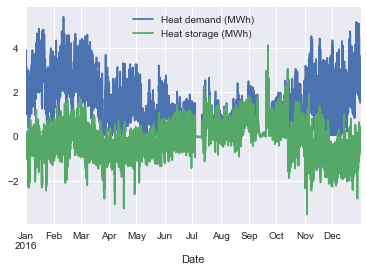

In [11]:
data[["Heat demand (MWh)", "Heat storage (MWh)"]].plot()

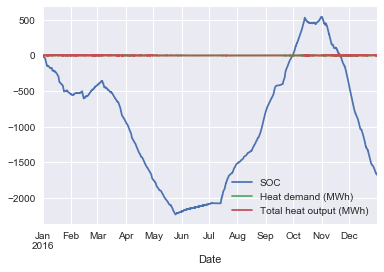

In [9]:
data[["SOC", "Heat demand (MWh)", "Total heat output (MWh)"]].plot()

In [ ]:
result["Hour"] = result.index.hour
result["DayOfWeek_name"]= [calendar.day_name[x] for x in result.index.dayofweek]
result["DayOfWeek"]= result.index.dayofweek
result["Month"] = result.index.month
result["Weekday"] = [1 if x<5 else 0 for x in result.index.dayofweek]
result["HH"] = [x%48 for x in range(0, result.shape[0], 1) ]
# result["Holiday"]= [1 if x.date() in uk_hol else 0 for x in result.index]
result["Date"] = result.index.date
result["Week"] = result.index.week

def get_season(row):
    if row['Month'] >= 3 and row['Month'] <= 5:
        return 'Spring'
    elif row['Month'] >= 6 and row['Month'] <= 8:
        return 'Summer'
    elif row['Month'] >= 9 and row['Month'] <= 11:
        return 'Autumn'
    else:
        return 'Winter'

season_dict = {"Winter":1, "Spring":2, "Summer":3, "Autumn":4}
inv_season_dict = {v: k for k, v in season_dict.items()}
result['Season'] = result.apply(get_season, axis=1)
result['Season num'] = result['Season']
result.replace({"Season num":season_dict}, inplace=True)
result.head()

In [ ]:
season="Summer"
g = sns.jointplot(x="Electricity demand", y="Heat demand", data=result.loc[result["Season"]==season, :], kind="kde", stat_func=None)
plt.savefig(path+season+"density-distribution.png")

In [ ]:
season= "Summer"
bins_size = 10
H, xedges, yedges= np.histogram2d(x=result.loc[result["Season"]==season, "Electricity demand"], y=result.loc[result["Season"]==season, "Heat demand"], bins=bins_size)
H= H.T
length_data = result.loc[result["Season"]==season, :].shape[0]
histogram=pd.DataFrame(data=H/length_data, columns= xedges[1:], index=yedges[1:])
histogram.to_csv(path+"Histogram-"+season+".csv")

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)

In [ ]:
length_data = result.loc[result["Season"]=="Winter", :].shape[0]

In [ ]:
result.loc[result["Season"]==season, "Electricity demand"].hist()

In [ ]:
result.loc[result["Season"]==season, "Heat demand"].hist()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax2 = ax.twinx()
result.loc[:, "Electricity demand"].resample('d').mean().plot(ax=ax, alpha=0.5, label="Electricity")
result.loc[:, "Heat demand"].resample('d').mean().plot(ax=ax2, color='green', alpha=0.5, label="Heat")
ax.set_xlabel("Date")
ax.set_ylabel("Average HH Electricity demand [kWh]")
ax2.set_ylabel("Average HH Heat demand [kWh]")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines= lines+lines2
labels=labels+labels2
ax.legend(lines, labels, title="Legend")
plt.savefig(path+"annual-demand.png")

In [ ]:
df = pd.read_csv(path+"Electricity load 2015-2016.csv")
cleanAndPrepare(df, "Electricity")

In [ ]:
df["HH"] = [x%48 for x in range(0, df.shape[0], 1) ]
df["Date"] = df.index.date
df.head()

In [ ]:
daybyHH = df.groupby(["Date", "HH"]).mean()
daybyHH=daybyHH.unstack("HH").reset_index()
daybyHH["Date"]=pd.to_datetime(daybyHH["Date"], format="%Y-%m-%d")
daybyHH.set_index("Date", inplace=True, drop=True)
# daybyHH.dropna(how='any', inplace=True)
daybyHH.head()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

def cluster(values):
    algorithm = "elkan"
    max_silhouette = 0.
    max_nb_values_over = 0.
    cluster_centers=[]
    cluster_labels=[]
    for n_clusters in range(2, 17, 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=10, algorithm="elkan", n_init=30).fit(values)
        labels_temp= kmeans.labels_
        silhouette_avg = metrics.silhouette_score(values, labels_temp)
        
        silhouette_samples_values = metrics.silhouette_samples(values, labels_temp)
        calinski_harabaz_score= metrics.calinski_harabaz_score(values, labels_temp)
        nb_values_over = 0
        print("cluster:", n_clusters , "silhouette score:" ,silhouette_avg, "calinski_harabaz:",calinski_harabaz_score )
#         if max_silhouette<silhouette_avg:
#             max_silhouette=silhouette_avg
#             cluster_centers= kmeans.cluster_centers_
#             cluster_labels= labels_temp


        nb_values_over = len(silhouette_samples_values[np.where(silhouette_samples_values>silhouette_avg)])
        print("Number of values over average:", nb_values_over, "({:04.1f}%)".format(nb_values_over/len(values)*100)) 
        
        if max_nb_values_over<nb_values_over:
            max_nb_values_over=nb_values_over
            cluster_centers= kmeans.cluster_centers_
            cluster_labels= labels_temp

        
    return cluster_centers.shape[0], cluster_centers, cluster_labels

In [ ]:
nb_clusters, cluster_centers, cluster_labels = cluster(daybyHH["Electricity"].values)
daybyHH["Labels Kmeans"] = cluster_labels
daybyHH.set_index("Labels Kmeans", append=True, inplace=True)


In [ ]:
df_to_plot= daybyHH.reorder_levels(["Labels Kmeans", "Date"], axis=0)
df_to_plot=  df_to_plot["Electricity"].sort_index(axis=0).transpose()
df_to_plot.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
color=["blue", "green", "black"]
x=[val for val in df_to_plot.index]
for n_cluster in range(nb_clusters):
    print(n_cluster)
    y1= df_to_plot.loc[:, n_cluster].quantile(0.05, axis=1).values
    y2= df_to_plot.loc[:, n_cluster].quantile(0.95, axis=1).values
    ax.fill_between(x, y1, y2, color=sns.color_palette()[n_cluster], alpha=0.5)
    plt.plot(x, cluster_centers[n_cluster], color=sns.color_palette()[n_cluster], alpha=1)
    plt.plot(x, df_to_plot.loc[:, n_cluster], color=sns.color_palette()[n_cluster], alpha=0.8, linewidth=0.3)
    
plt.savefig(path+"cluster_electricity_winter.png")